# Exercise 8: Sound transformations

In this exercise you will use the HPS model to creatively transform sounds. There are two parts in this exercise. In the first one you should perform a natural sounding transformation on the speech sound that you used in the previous exercise (E7). In the second part you should select a sound of your choice and do a "creative" transformation. You will have to write a short description of the sound and of the transformation you did, giving the link to the original sound and uploading several transformed sounds.

For this exercise, you can use the `transformations_GUI.py` (in `software/transformations_interface/`) to try things, once decided you can fill up the code in this file. You can also do everything from here and add any new code you wish.

In order to perform a good/interesting transformation you should make sure that you have performed an analysis that is adequate for the type of transformation you want to do. Not every HPS analysis representation will work for every type of sound transformation. There will be things in the analysis that when modified will result in undesired artifacts. In general, for any transformation, it is best to have the harmonic values as smooth and continuous as possible and an stochastic representation as smooth and with as few values as possible. It might be much better to start with an analysis representation that does not result in the best reconstruction in exchange of having smoother and more compact data.

To help you with the exercise, we give a brief description of the transformation parameters used by the HPS transformation function:

1. `freqScaling`: frequency scaling factors to be applied to the harmonics of the sound, in time-value pairs (where value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The scaling factor is a multiplicative factor, thus a value of 1 is no change. Example: to transpose an octave the sound you can specify `[0, 2, 1, 2]`.
2. `freqStretching`: frequency stretching factors to be applied to the harmonics of the sound, in time-value pairs (value of 1 is no stretching). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The stretching factor is a multiplicative factor whose effect depend on the harmonic number, higher harmonics being more affected that lower ones, thus resulting in an inharmonic effect. A value of 1 results in no transformation. Example: an array like `[0, 1.2, 1, 1.2]` will result in a perceptually large inharmonic effect.
3. `timbrePreservation`: 1 preserves the original timbre, 0 does not. It can only have a value of 0 or of 1. By setting the value to 1 the spectral shape of the original sound is preserved even when the frequencies of the sound are modified. In the case of speech it would correspond to the idea of preserving the identity of the speaker after the transformation.
4. `timeScaling`: time scaling factors to be applied to the whole sound, in time-value pairs (value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The time scaling factor is a multiplicative factor, thus 1 is no change. Example: to stretch the original sound to twice the original duration, we can specify `[0, 0, 1, 2]`.

All the transformation values can have as many points as desired, but they have to be in the form of an array with time-value pairs, so of even size. For example a good array for a frequency stretching of a sound that has a duration of 3.146 seconds could be: `[0, 1.2, 2.01, 1.2, 2.679, 0.7, 3.146, 0.7]`.

## Part 1. Perform natural sounding transformations of a speech sound

Use the HPS model with the sound `speech-female.wav`, available in the sounds directory, to first analyze and then obtain a natural sounding transformation of the sound. The synthesized sound should sound as different as possible to the original sound while sounding natural. By natural we mean that it should sound like speech, that it could have been possible to be produced by a human, and by listening we should consider it as a speech sound, even though we might not be able to understand it. You should first make sure that you start from a good analysis, then you can do time and/or frequency scaling transformations. The transformation should be done with a single pass, no mixing of sounds coming from different transformations. Since you used the same sound in A7, use that experience to get a good analysis, but consider that the analysis, given that we now want to use it for applying a very strong transformation, might be done differently than what you did in A7.

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

In [1]:
import numpy as np
from scipy.signal import get_window
import matplotlib.pyplot as plt
import IPython.display as ipd

from smstools.models import utilFunctions as UF
from smstools.models import stft as STFT
from smstools.models import hpsModel as HPS
from smstools.transformations import hpsTransformations as HPST
from smstools.transformations import harmonicTransformations as HT
import IPython.display as ipd

Text(0.5, 1.0, 'magnitude spectrogram')

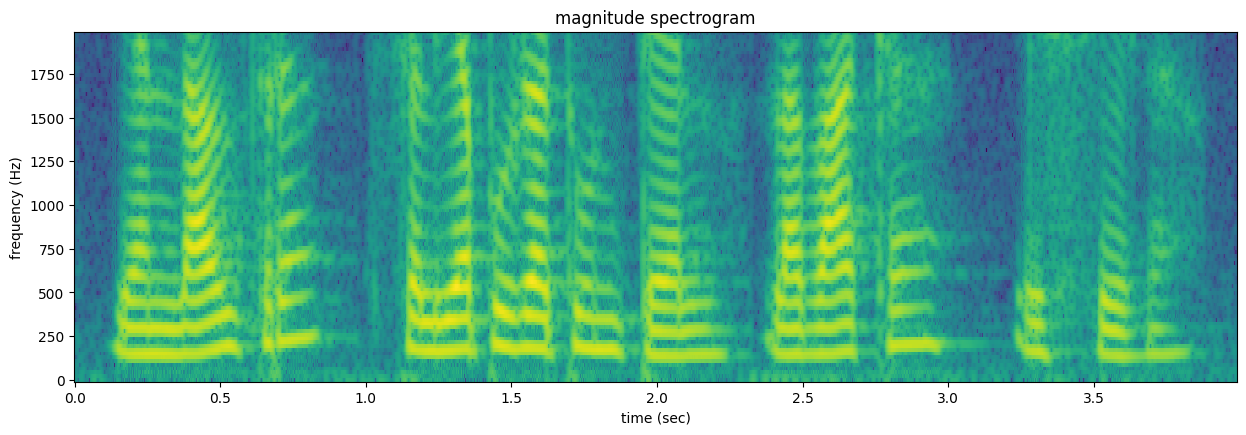

In [36]:
# 1.1 perform an analysis/synthesis using the HPS model

input_file = '../sounds/speech-female.wav'

### set the parameters
window ='hamming'
M = 1501
N = 2048
t = -90
minSineDur = 0.1
nH = 50 
minf0 = 120
maxf0 = 260
f0et = 5
harmDevSlope = 0.01
stocf = 0.1

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y, rate=fs))

# plot input magnitude spectrogram
mX, pX = STFT.stftAnal(x, w, N, H)
plt.figure(figsize=(15, 10))
plt.subplot(2,1,2)
maxplotfreq = 2000.0
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = fs*np.arange(N*maxplotfreq/fs)/N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
plt.xlabel('time (sec)')
plt.ylabel('frequency (Hz)')
plt.title('magnitude spectrogram')

**Question E8 - 1.2:**

explain your parameter choices in 1.2

The analysis parameters were kept the same as the previous assignment, because they successfully captured the female voice characteristics and provided good results. A Hamming window (size 1501, FFT 2048) was used to achieve sufficient frequency resolution for distinguishing individual harmonics within the fundamental frequency range (150-250 Hz). The magnitude threshold was set to -90 dB based on the spectrogram to capture the voice's dynamic range. The analysis tracked 50 harmonics, which was perceptually adequate for speech, with the frequency range set to 120-260 Hz. The f0 error threshold was set to 5 Hz to maintain stable tracking, and the harmonic deviation slope of 0.01 provided flexibility for tracking slight harmonic variations without including noise. The minimum sine duration was set to 0.1 seconds based on the spectrogram's time characteristics, and the stochastic parameter of 0.1 gave natural results after comparison with the sinusoidal-plus-residual model. 
________

1376


Text(0.5, 1.0, 'magnitude spectrogram')

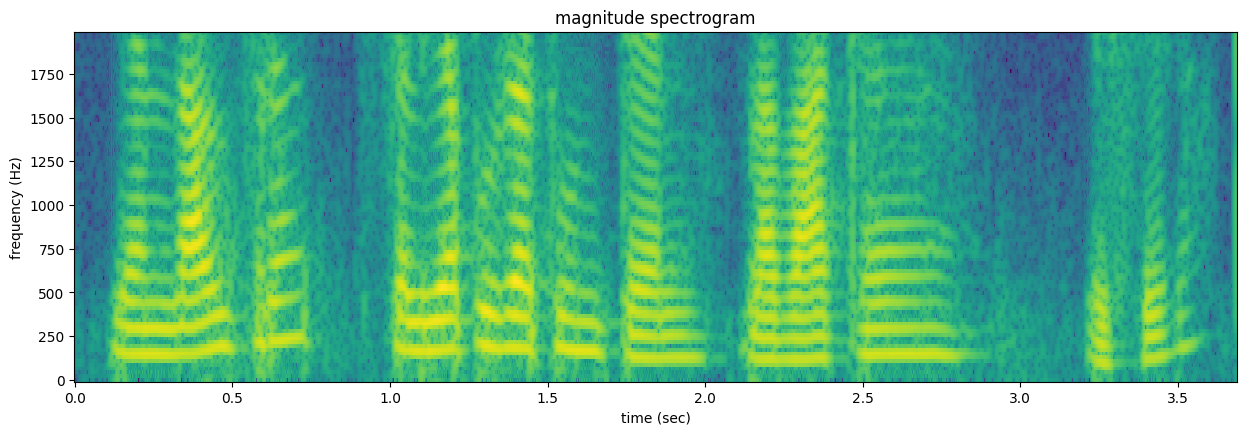

In [37]:
# 1.3 Perform a transformation from the previous analysis
#FIRST CASE
import matplotlib.pyplot as plt

freqScaling = np.array([
    0,     1.0,     
    0.12,  1.0,     
    0.26, 0.6,     
    0.3,   2.0     
])

timbrePreservation = 1
freqStretching = np.array([
    0,   1.0, 
    0.3, 1.0
])
timeScaling = np.array([0, 0, 0.7, 0.625, 0.8, 0.8, 1, 0.925]) 


# no need to modify the following code 
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)
print(len(hfreq))

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

# plot magnitude spectrogram
mX, pX = STFT.stftAnal(y, w, N, H)
plt.figure(figsize=(15, 10))
maxplotfreq = 2000.0
plt.subplot(2,1,2)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = fs*np.arange(N*maxplotfreq/fs)/N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
plt.xlabel('time (sec)')
plt.ylabel('frequency (Hz)')
plt.title('magnitude spectrogram')



First trial: creating a question

Frequency Scaling: The frequency scaling was set to create a questioning, hesitant speech pattern. The sound begins at the original pitch (factor 1.0) for the first part. Around 0.26 seconds, the pitch drops to 0.6, creating a temporary lowering that sounds like a moment of thinking or uncertainty. At the end (0.3), the pitch rises suddenly to 2.0 (one octave up), making the final words sound higher and creating a clear question-like intonation. This mimics how people naturally raise their voice when asking a question.

Frequency Stretching: Frequency stretching was kept constant at 1.0 throughout, meaning the spacing between harmonics stays the same. This preserves the natural voice quality.

Timbre Preservation: Timbre preservation was set to 1, which maintains the spectral envelope during transformations. This keeps the voice sounding natural as the pitch changes, preventing unnatural or robotic artifacts.

Time Scaling: The time scaling was adjusted to create hesitation in the speech. The middle section (input 0.7 to 0.8) is stretched in the output (0.625 to 0.8), meaning this part plays more slowly and sounds drawn out, like someone pausing while thinking. The final output is slightly compressed (input ends at 1.0, output ends at 0.925). These timing changes make the voice sound uncertain and hesitant.


1376


Text(0.5, 1.0, 'magnitude spectrogram')

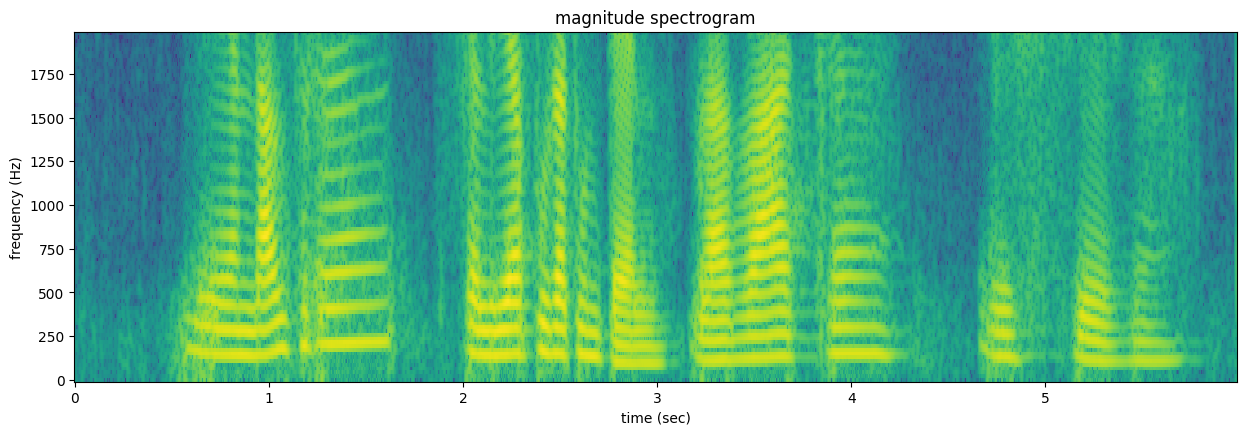

In [38]:
#SECOND CASE
### define the transformations

freqScaling = np.array([
    0,     1.0,
    0.225, 0.80,   
    0.275, 0.65,   
    0.325, 0.85,  
    0.375, 0.70,   
    0.425, 0.88,  
    0.475, 0.72,  
    0.5,   0.82    
])

freqStretching = np.array([
    0,   0.99,
    0.5, 0.99
])

timbrePreservation = 1 

timeScaling = np.array([0, 0, 0.05, 0.2, 0.17, 0.3, 0.2, 0.4, 0.28, 0.5, 0.36, 0.6, 0.5, 0.7, 0.6, 0.8, 1, 1.5])


# no need to modify the following code 
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)
print(len(hfreq))

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

# plot magnitude spectrogram
mX, pX = STFT.stftAnal(y, w, N, H)
plt.figure(figsize=(15, 10))
maxplotfreq = 2000.0
plt.subplot(2,1,2)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = fs*np.arange(N*maxplotfreq/fs)/N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
plt.xlabel('time (sec)')
plt.ylabel('frequency (Hz)')
plt.title('magnitude spectrogram')

**Question E8 1-4:**

Second trial: speech of an older person

Frequency Scaling: The frequency scaling was designed to mimic an older woman's voice by creating subtle pitch fluctuations throughout the 0-0.5 second range. The pitch oscillates between slight drops (0.65-0.88), trying to mimic the wavering, tremulous characteristic of aging voices. These small variations simulate the reduced vocal control and slight pitch instability often present in elderly speech, where the voice wavers rather than maintaining steady pitch. Also, older voices typically have lower pitch due to changes in vocal fold tension and muscle control with age.

Frequency Stretching: A slight compression factor of 0.99 was applied consistently throughout, causing harmonics to compress very slightly. This subtle inharmonicity mimics the less precise harmonic structure that can occur with age-related changes in vocal fold tension and breathing control.

Timbre Preservation: Set to 1 to maintain spectral envelope integrity and preserve voice quality while implementing the pitch and timing changes.

Time scaling: I created uneven pacing throughout the phrase to mimic elderly speech. The opening is significantly stretched (input 0-0.05 becomes output 0-0.2), immediately slowing the start. The middle sections continue with progressive stretching, with some segments slowed more than others to create irregular, hesitant pacing. The entire phrase is stretched to end at 1.5 seconds instead of 1.0, creating an overall slower pace typical of older speakers. These stretched moments sound like the speaker is pausing or speaking with effort.
___

## Part 2. Perform creative transformations with a sound of your choice

Pick any natural and harmonic sound from Freesound and use the HPS model to do the most creative and interesting transformation you can come up with. Sounding as different as possible from the original sound.

It is essential that you start with a natural harmonic sound. Examples include (but not limited to) any acoustic harmonic instrument, speech, harmonic sound from nature, etc. As long as they have a harmonic structure, you can use it. You can even reuse the sound you used in A7-Part2 or upload your own sound to freesound and then use it.

The sound from Freesound to use could be in any format, but to use the sms-tools software you will have to first convert it to be a monophonic file (one channel), sampling rate of 44100, and 16bits samples.

You can do any interesting transformation with a single pass. It is not allowed to mix sounds obtained from different transformations. The transformed sound need not sound natural. So, time to show some creativity!

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

Text(0.5, 1.0, 'magnitude spectrogram')

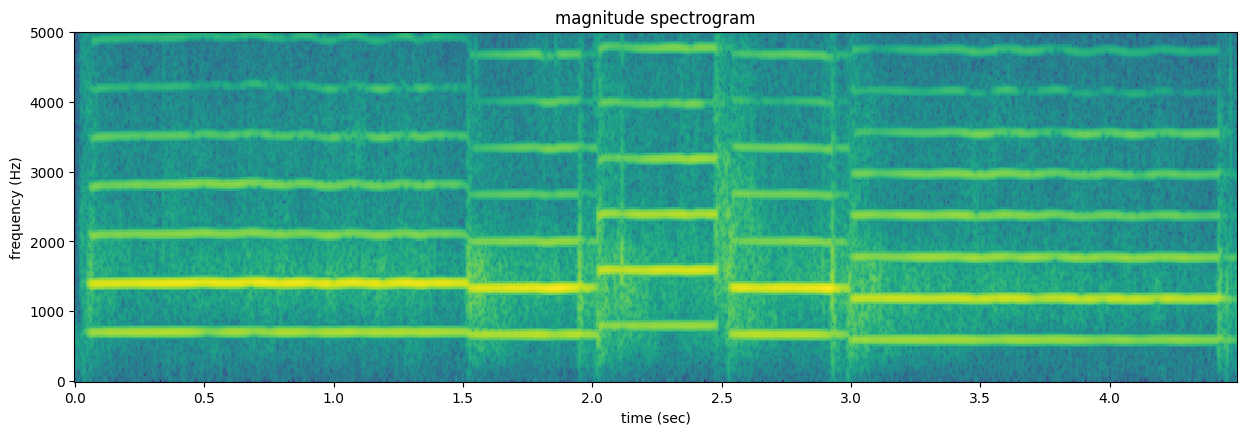

In [22]:
# 2.1 perform an analysis/synthesis using the HPS model

### set the parameters
input_file = '../sounds/oboe_.wav'
window ='blackmanharris'
M = 1501
N = 2048
t = -105
minSineDur = 0.1
nH = 40
minf0 = 570
maxf0 = 840
f0et = 5
harmDevSlope = 0.02
stocf = 0.1

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y, rate=fs))
# plot magnitude spectrogram
mX, pX = STFT.stftAnal(y, w, N, H)
plt.figure(figsize=(15, 10))
maxplotfreq = 5000.0
plt.subplot(2,1,2)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = fs*np.arange(N*maxplotfreq/fs)/N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
plt.xlabel('time (sec)')
plt.ylabel('frequency (Hz)')
plt.title('magnitude spectrogram')

**Question E8 2.2:**

The analysis parameters were kept the same as the previous assignment because they gave good results in capturing the oboe's characteristics. A Blackman-Harris window (size 1501, FFT 2048) was used with a threshold of -105 dB to capture the quiet vibrato. The analysis tracked 40 harmonics with an f0 error of 5 Hz to follow the strong vibrato, and a harmonic deviation slope of 0.02 to deal with the oboe's slightly out-of-tune upper harmonics. The minimum sine duration was set to 0.1 seconds based on the slow tempo, and the stochastic factor of 0.1 captured mechanical sounds like key presses and breathing. This analysis was able to capture both the harmonic and noisy parts of the oboe sound, allowing the following transformations.

___

Text(0.5, 1.0, 'magnitude spectrogram')

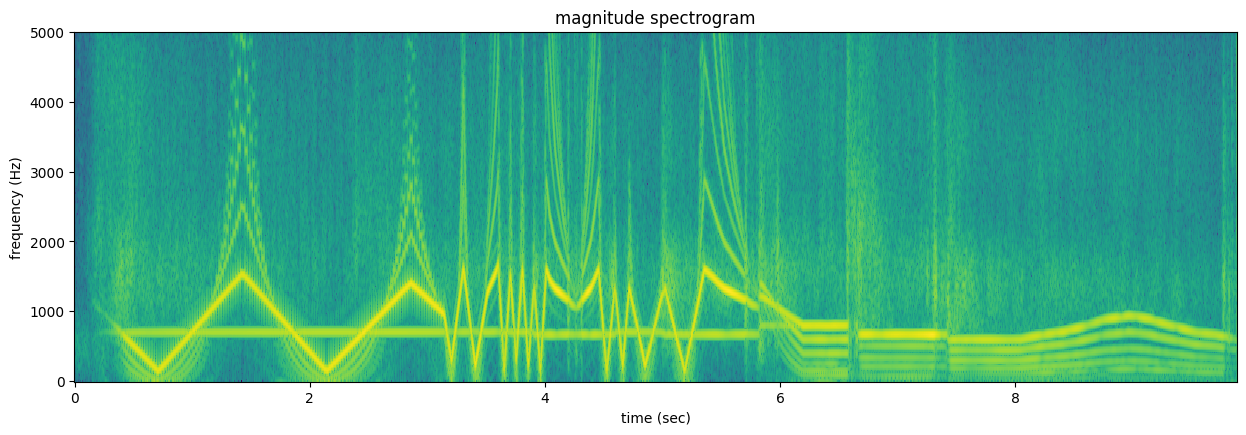

In [23]:
# 2.3 Perform a transformation from the previous analysis

### define the transformations
freqScaling = np.array([
    0,    1.0, 
    1.65, 1.0,      
    1.705, 1.1225,  
    1.76, 1.1892,   
    1.815, 1.3348,  
    1.87, 1.4983,   
    1.925, 1.5874, 
    1.98, 1.4983,   
    2.035, 1.3348,  
    2.09, 1.1892,   
    2.145, 1.1225, 
    2.2,  1.0     
])
freqStretching = np.array([
     0,    1.0,    
    0.05, 0.1,    
    0.1,  1.1,    
    0.15, 0.1,    
    0.2,  1.0,    
    0.25, 0.2,    
    0.3,  1.15,   
    0.35, 0.15,   
    0.4,  0.9,   
    0.45, 1.2,    
    0.5,  0.1,   
    0.55, 1.1,    
    0.6,  0.2,    
    0.65, 1.15,   
    0.7,  0.15,  
    0.75, 1.0,    
    0.8,  0.1,    
    0.85, 1.2,    
    0.9,  1.0,    
    1.1,  0.5,    
    2.2,  0.5      
])

timbrePreservation = 0
#timeScaling = np.array([0, 0, 0.1, 0.3, 0.2, 0.4, 0.3, 0.65, 0.4, 0.5, 1, 1.35])
timeScaling = np.array([0, 0, 0.1, 0.7, 0.2, 0.8, 0.3, 1.05, 0.4, 0.9, 0.45, 0.95, 1, 2.2])


# no need to modify anything after this
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

# plot magnitude spectrogram
mX, pX = STFT.stftAnal(y, w, N, H)
plt.figure(figsize=(15, 10))
maxplotfreq = 5000.0
plt.subplot(2,1,2)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = fs*np.arange(N*maxplotfreq/fs)/N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]))
plt.xlabel('time (sec)')
plt.ylabel('frequency (Hz)')
plt.title('magnitude spectrogram')

**Question E8 - 2.4:**

explain your transformations

Freq scaling: The first half of the audio, was chosen to stay at the original pitch (factor 1.0), so that I could experiment more with the Frequency stretching parameter. Between 1.65 and 2.2 seconds, where there is a stable note, I implemented a minor scale passage. This was achieved by computing the scaling factors for each scale degree following the natural minor scale pattern (W-H-W-W-H-W-W, where W = whole step = 2 semitones, H = half step = 1 semitone), where scaling factor = 2^ (semitone/12). The specific factors used were: root (1.0), major 2nd (1.1225), minor 3rd (1.1892), perfect 4th (1.3348), perfect 5th (1.4983), and minor 6th (1.5874). Each note is spaced approximately 0.055 seconds apart to create a rapid, expressive ornamental effect. 

The passage result sounds wind-like because the rapid pitch changes create a whistling effect, combined with the distorted harmonics from frequency stretching. The ascending-descending pattern mimics wind gusts, while the changing tone (with timbre preservation disabled) adds a breathy, airy character.

Frequency stretching: An aggresive pattern was applied to the 0-0.9 seconds range to create an extreme timbral change throughout the phrase. The stretching alternates very quickly between extreme compression (values of 0.1-0.2) and extreme stretching (values of 1.1-1.2), with transitions occurring every 0.05 seconds. When the stretching factor is below 1.0, harmonics are compressed together, creating dark, muffled textures. When above 1.0, harmonics spread apart with higher harmonics becoming increasingly inharmonic, producing metallic, bell-like timbres. This rapid oscillation between these extreme states creates a chaotic effect that transforms the oboe's natural timbre. From 1.1 seconds and after, a compression factor of 0.7 is maintained, giving the sustained notes a darker character.

Timbre preservation was set to 0, meaning the spectral envelope is not maintained during frequency transformations. This allows the spectral shape to change naturally with pitch changes, making timbral alterations more intense and not maintaining the original oboe character.

Time scaling: First, the opening section (0-0.1 of the input) is stretched to 0.7 seconds in the output, creating a slow-motion introduction that emphasizes the chaotic frequency stretching effects.At the 0.3 to 0.4 input segment, I implemented a temporal reversal  where the audio jumps backward from output time 1.05 to 0.9 seconds. This creates a small reverse playback effect sounding like a glitch or a decorative gesture. Finally, the ending (0.45-1.0 of input) is stretched to last from 0.95 to 2.2 seconds, making it easier to experiment with the minor scale passage, applied in the frequency scaling parameter.

___
